In [190]:
# Install the Spotify Library
!pip install Spotipy

In [1]:
import pandas as pd
import numpy as np
import datetime
import time
from math import pi, ceil

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [12]:
import pandas as pd
df_all = pd.read_csv('https://raw.githubusercontent.com/enjuichang/PracticalDataScience-ENCA/main/data/allsong_data.csv')
df_complete = pd.read_csv('https://raw.githubusercontent.com/enjuichang/PracticalDataScience-ENCA/main/data/complete_feature.csv')
df_processed = pd.read_csv('https://raw.githubusercontent.com/enjuichang/PracticalDataScience-ENCA/main/data/processed_data.csv')
df_raw = pd.read_csv('https://raw.githubusercontent.com/enjuichang/PracticalDataScience-ENCA/main/data/raw_data.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/enjuichang/PracticalDataScience-ENCA/main/data/test_playlist.csv')

In [15]:
df_all.tail()

,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,genres,track_pop,genres_list,subjectivity,polarity
34242,Jon D,3uCHI1gfOUL5j5swEh0TcH,I Don't Know,0.669,0.228,2,-12.119,1,0.0690,0.7920,0.065000,0.0944,0.402,83.024,47,unknown,27,['unknown'],low,Neutral
34243,Big Words,0P1oO2gREMYUCoOkzYAyFu,The Answer,0.493,0.727,1,-5.031,1,0.2170,0.0873,0.000000,0.1290,0.289,73.259,39,australian_r&b,37,['australian_r&b'],low,Neutral
34244,Allan Rayman,2oM4BuruDnEvk59IvIXCwn,25.22,0.702,0.524,7,-10.710,1,0.0793,0.3320,0.055300,0.2980,0.265,140.089,55,canadian_contemporary_r&b modern_alternative_rock,49,"['canadian_contemporary_r&b', 'modern_alternat...",low,Neutral
34245,Jon Jason,4Ri5TTUgjM96tbQZd5Ua7V,Good Feeling,0.509,0.286,8,-14.722,1,0.1230,0.4020,0.000012,0.1310,0.259,121.633,4,unknown,16,['unknown'],high,Positive
34246,Grizfolk,5RVuBrXVLptAEbGJdSDzL5,Cosmic Angel - Acoustic From Capitol Studios,0.639,0.461,6,-8.260,0,0.0493,0.3570,0.000057,0.1120,0.264,117.583,53,indie_poptimism indiecoustica modern_alternati...,40,"['indie_poptimism', 'indiecoustica', 'modern_a...",low,Neutral


In [16]:
df_complete.tail()

,genre|_hip_hop,genre|abstract_hip_hop,genre|acoustic_pop,genre|adult_standards,genre|aesthetic_rap,genre|afrofuturism,genre|alabama_indie,genre|album_rock,genre|albuquerque_indie,genre|alt_z,...,key|5,key|6,key|7,key|8,key|9,key|10,key|11,mode|0,mode|1,id
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,5qOvJSBgSGUFEYKjrcxIH4
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,581gLYhF5OxQzgfIMGlAvu
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,7zPzpfKVpNPlk1qKhie2JZ
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,1dKDRs99KkNbtC9AHM7TLm
999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,3yGDoiAluqaZd5rSkD1EF0


In [13]:
df_processed.tail()

,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,genres,track_pop,genres_list,subjectivity,polarity
34242,Jon D,3uCHI1gfOUL5j5swEh0TcH,I Don't Know,0.669,0.228,2,-12.119,1,0.0690,0.7920,0.065000,0.0944,0.402,83.024,47,unknown,27,['unknown'],low,Neutral
34243,Big Words,0P1oO2gREMYUCoOkzYAyFu,The Answer,0.493,0.727,1,-5.031,1,0.2170,0.0873,0.000000,0.1290,0.289,73.259,39,australian_r&b,37,['australian_r&b'],low,Neutral
34244,Allan Rayman,2oM4BuruDnEvk59IvIXCwn,25.22,0.702,0.524,7,-10.710,1,0.0793,0.3320,0.055300,0.2980,0.265,140.089,55,canadian_contemporary_r&b modern_alternative_rock,49,"['canadian_contemporary_r&b', 'modern_alternat...",low,Neutral
34245,Jon Jason,4Ri5TTUgjM96tbQZd5Ua7V,Good Feeling,0.509,0.286,8,-14.722,1,0.1230,0.4020,0.000012,0.1310,0.259,121.633,4,unknown,16,['unknown'],high,Positive
34246,Grizfolk,5RVuBrXVLptAEbGJdSDzL5,Cosmic Angel - Acoustic From Capitol Studios,0.639,0.461,6,-8.260,0,0.0493,0.3570,0.000057,0.1120,0.264,117.583,53,indie_poptimism indiecoustica modern_alternati...,40,"['indie_poptimism', 'indiecoustica', 'modern_a...",low,Neutral


In [14]:
df_raw.tail()

,Unnamed: 0,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,name
67498,67498,39,James Arthur,spotify:track:5uCax9HTNlzGybIStD3vDh,spotify:artist:4IWBUUAFIplrNtaOHcJPRM,Say You Won't Let Go,spotify:album:7oiJYvEJHsmYtrgviAVIBD,211466,Back from the Edge,thinking of you
67499,67499,40,Big Words,spotify:track:0P1oO2gREMYUCoOkzYAyFu,spotify:artist:0sHN89qak07mnug3LVVjzP,The Answer,spotify:album:5jrsRHRAmetu5e7RRBoxj7,263679,"Hollywood, a Beautiful Coincidence",thinking of you
67500,67500,41,Allan Rayman,spotify:track:2oM4BuruDnEvk59IvIXCwn,spotify:artist:6Yv6OBXD6ZQakEljaGaDAk,25.22,spotify:album:3CbNgBzI7r9o0F6VjH9sTY,189213,Roadhouse 01,thinking of you
67501,67501,42,Jon Jason,spotify:track:4Ri5TTUgjM96tbQZd5Ua7V,spotify:artist:77bNdkKYBBmc30CisCA6tE,Good Feeling,spotify:album:2dZ7oVNQBeLlpoUYfbEsJP,194720,Good Feeling,thinking of you
67502,67502,43,Grizfolk,spotify:track:5RVuBrXVLptAEbGJdSDzL5,spotify:artist:6Xa4nbrSTfbioA4lLShbjh,Cosmic Angel - Acoustic From Capitol Studios,spotify:album:7D6Y19tjm4DQNch39FeWpO,257194,Cosmic Angel,thinking of you


In [17]:
df_test.tail()

,Unnamed: 0,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,name,...,id,uri,track_href,analysis_url,duration_ms_y,time_signature,artist_pop,genres,track_pop,artists_song
70,4460,70,Beach Avenue,5qOvJSBgSGUFEYKjrcxIH4,spotify:artist:1PIHeZihgTnnid2lh7DbGS,Coming Your Way,spotify:album:0iz9MXK46v7KjReQRfjSzK,183903,Coming Your Way,Mom's playlist,...,5qOvJSBgSGUFEYKjrcxIH4,spotify:track:5qOvJSBgSGUFEYKjrcxIH4,https://api.spotify.com/v1/tracks/5qOvJSBgSGUF...,https://api.spotify.com/v1/audio-analysis/5qOv...,183904,3,22,unknown,37,Beach AvenueComing Your Way
71,4461,71,Built By Titan,581gLYhF5OxQzgfIMGlAvu,spotify:artist:0LmXoyW6K4zJ48lCRq7w3h,Collide (feat. Jonathan Thulin),spotify:album:7fGu9C0cdUuHajJbVzbaTI,235775,Alpha,Mom's playlist,...,581gLYhF5OxQzgfIMGlAvu,spotify:track:581gLYhF5OxQzgfIMGlAvu,https://api.spotify.com/v1/tracks/581gLYhF5OxQ...,https://api.spotify.com/v1/audio-analysis/581g...,235776,4,45,cedm christian_pop,42,Built By TitanCollide (feat. Jonathan Thulin)
72,4462,72,Astoria Kings,7zPzpfKVpNPlk1qKhie2JZ,spotify:artist:0f4xt3e1qtGldco8On65Ac,Come Alive,spotify:album:5nRkY6Xb1fkp45csQTzDNx,226213,Come Alive,Mom's playlist,...,7zPzpfKVpNPlk1qKhie2JZ,spotify:track:7zPzpfKVpNPlk1qKhie2JZ,https://api.spotify.com/v1/tracks/7zPzpfKVpNPl...,https://api.spotify.com/v1/audio-analysis/7zPz...,226213,4,7,unknown,0,Astoria KingsCome Alive
73,4463,73,Anthem Lights,1dKDRs99KkNbtC9AHM7TLm,spotify:artist:7kwEvDE8e7EBGKh5bLczqQ,Best of 2012: Payphone / Call Me Maybe / Wide ...,spotify:album:4iyn5H88RVqMJcbuCygfkw,209134,Best of the Year Medleys: 2007 - 2012,Mom's playlist,...,1dKDRs99KkNbtC9AHM7TLm,spotify:track:1dKDRs99KkNbtC9AHM7TLm,https://api.spotify.com/v1/tracks/1dKDRs99KkNb...,https://api.spotify.com/v1/audio-analysis/1dKD...,209134,5,63,ccm christian_alternative_rock christian_music...,57,Anthem LightsBest of 2012: Payphone / Call Me ...
74,4465,74,Yellowcard,3yGDoiAluqaZd5rSkD1EF0,spotify:artist:3zxKH0qp3nBCuPZCZT5Vaf,Always Summer,spotify:album:3JsD7cWTptlNdbPYdk19hu,189585,Southern Air,Mom's playlist,...,3yGDoiAluqaZd5rSkD1EF0,spotify:track:3yGDoiAluqaZd5rSkD1EF0,https://api.spotify.com/v1/tracks/3yGDoiAluqaZ...,https://api.spotify.com/v1/audio-analysis/3yGD...,189585,4,65,bow_pop pop_punk rock socal_pop_punk,0,YellowcardAlways Summer


**The two datasets in use are: df_raw and df_test**

But df_raw isn't processed so use df_processed

In [25]:
# Drop everything that's not importatn for model building... 
df_new = df_processed[['artist_name','track_name','duration_ms_x','duration_ms_y','album_name','name','danceability', 'energy', 'key', 'loudness', 'mode',
'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','time_signature']]
df_new

,artist_name,track_name,duration_ms_x,duration_ms_y,album_name,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),226863,226864,The Cookbook,Throwbacks,0.904,0.813,4,-7.105,0,0.1210,0.0311,0.006970,0.0471,0.810,125.461,4
1,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),226863,226864,The Cookbook,w o r k o u t,0.904,0.813,4,-7.105,0,0.1210,0.0311,0.006970,0.0471,0.810,125.461,4
2,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),226863,226864,The Cookbook,party playlist,0.904,0.813,4,-7.105,0,0.1210,0.0311,0.006970,0.0471,0.810,125.461,4
3,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),226863,226864,The Cookbook,Dance mix,0.904,0.813,4,-7.105,0,0.1210,0.0311,0.006970,0.0471,0.810,125.461,4
4,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),226863,226864,The Cookbook,spin,0.904,0.813,4,-7.105,0,0.1210,0.0311,0.006970,0.0471,0.810,125.461,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67494,Jon D,I Don't Know,189183,189184,Roots,thinking of you,0.669,0.228,2,-12.119,1,0.0690,0.7920,0.065000,0.0944,0.402,83.024,4
67495,Big Words,The Answer,263679,263680,"Hollywood, a Beautiful Coincidence",thinking of you,0.493,0.727,1,-5.031,1,0.2170,0.0873,0.000000,0.1290,0.289,73.259,4
67496,Allan Rayman,25.22,189213,189213,Roadhouse 01,thinking of you,0.702,0.524,7,-10.710,1,0.0793,0.3320,0.055300,0.2980,0.265,140.089,4
67497,Jon Jason,Good Feeling,194720,194720,Good Feeling,thinking of you,0.509,0.286,8,-14.722,1,0.1230,0.4020,0.000012,0.1310,0.259,121.633,4


# Testing Data

In [24]:
# Let's take out everything that's not needed
df_new_test = df_test[['artist_name','track_name','duration_ms_x','duration_ms_y','album_name','name','danceability', 'energy', 'key', 'loudness', 'mode',
'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','time_signature']]
df_new_test

,artist_name,track_name,duration_ms_x,duration_ms_y,album_name,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,The Killers,Mr. Brightside,222586,222587,Hot Fuss,Mom's playlist,0.356,0.924,1,-3.740,1,0.0808,0.001010,0.000000,0.0953,0.232,148.017,4
1,Rihanna,We Found Love,215226,215227,Talk That Talk,Mom's playlist,0.734,0.766,1,-4.485,1,0.0383,0.025000,0.001380,0.1080,0.600,127.986,4
2,American Authors,Best Day Of My Life,194240,194240,"Oh, What A Life",Mom's playlist,0.670,0.905,2,-2.385,1,0.0339,0.062500,0.000151,0.0577,0.516,100.021,4
3,Clean Bandit,Rather Be (feat. Jess Glynne),227833,227833,I Cry When I Laugh,Mom's playlist,0.799,0.586,11,-6.735,1,0.0377,0.162000,0.000002,0.1930,0.549,120.970,4
4,Sia,Chandelier,216120,216120,1000 Forms Of Fear,Mom's playlist,0.399,0.787,1,-2.880,1,0.0499,0.019700,0.000061,0.0685,0.572,117.089,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Beach Avenue,Coming Your Way,183903,183904,Coming Your Way,Mom's playlist,0.658,0.621,2,-6.401,1,0.0244,0.087000,0.000000,0.5600,0.418,108.006,3
71,Built By Titan,Collide (feat. Jonathan Thulin),235775,235776,Alpha,Mom's playlist,0.549,0.924,0,-2.896,0,0.0671,0.012100,0.000397,0.1380,0.266,122.953,4
72,Astoria Kings,Come Alive,226213,226213,Come Alive,Mom's playlist,0.541,0.950,1,-3.249,1,0.0941,0.085500,0.000000,0.0601,0.770,153.922,4
73,Anthem Lights,Best of 2012: Payphone / Call Me Maybe / Wide ...,209134,209134,Best of the Year Medleys: 2007 - 2012,Mom's playlist,0.375,0.418,11,-5.999,1,0.0360,0.688000,0.000000,0.3710,0.287,136.319,5


# Differentiate

In [26]:
df_new['playlist_track'] = 1
df_new_test['playlist_track'] = 0

<ipython-input-26-0ef4bc608a90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['playlist_track'] = 1
<ipython-input-26-0ef4bc608a90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_test['playlist_track'] = 0


In [28]:
df_new_test.head()

,artist_name,track_name,duration_ms_x,duration_ms_y,album_name,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_track
0,The Killers,Mr. Brightside,222586,222587,Hot Fuss,Mom's playlist,0.356,0.924,1,-3.740,1,0.0808,0.00101,0.000000,0.0953,0.232,148.017,4,0
1,Rihanna,We Found Love,215226,215227,Talk That Talk,Mom's playlist,0.734,0.766,1,-4.485,1,0.0383,0.02500,0.001380,0.1080,0.600,127.986,4,0
2,American Authors,Best Day Of My Life,194240,194240,"Oh, What A Life",Mom's playlist,0.670,0.905,2,-2.385,1,0.0339,0.06250,0.000151,0.0577,0.516,100.021,4,0
3,Clean Bandit,Rather Be (feat. Jess Glynne),227833,227833,I Cry When I Laugh,Mom's playlist,0.799,0.586,11,-6.735,1,0.0377,0.16200,0.000002,0.1930,0.549,120.970,4,0
4,Sia,Chandelier,216120,216120,1000 Forms Of Fear,Mom's playlist,0.399,0.787,1,-2.880,1,0.0499,0.01970,0.000061,0.0685,0.572,117.089,5,0


# Combine

In [29]:
# create main dataframe using training songs and all test's songs, to be fed into model
main_df = pd.concat([df_new, df_new_test], axis=0).reset_index(drop=True)
main_df

,artist_name,track_name,duration_ms_x,duration_ms_y,album_name,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_track
0,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),226863,226864,The Cookbook,Throwbacks,0.904,0.813,4,-7.105,0,0.1210,0.031100,0.006970,0.0471,0.810,125.461,4,1
1,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),226863,226864,The Cookbook,w o r k o u t,0.904,0.813,4,-7.105,0,0.1210,0.031100,0.006970,0.0471,0.810,125.461,4,1
2,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),226863,226864,The Cookbook,party playlist,0.904,0.813,4,-7.105,0,0.1210,0.031100,0.006970,0.0471,0.810,125.461,4,1
3,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),226863,226864,The Cookbook,Dance mix,0.904,0.813,4,-7.105,0,0.1210,0.031100,0.006970,0.0471,0.810,125.461,4,1
4,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),226863,226864,The Cookbook,spin,0.904,0.813,4,-7.105,0,0.1210,0.031100,0.006970,0.0471,0.810,125.461,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67569,Beach Avenue,Coming Your Way,183903,183904,Coming Your Way,Mom's playlist,0.658,0.621,2,-6.401,1,0.0244,0.087000,0.000000,0.5600,0.418,108.006,3,0
67570,Built By Titan,Collide (feat. Jonathan Thulin),235775,235776,Alpha,Mom's playlist,0.549,0.924,0,-2.896,0,0.0671,0.012100,0.000397,0.1380,0.266,122.953,4,0
67571,Astoria Kings,Come Alive,226213,226213,Come Alive,Mom's playlist,0.541,0.950,1,-3.249,1,0.0941,0.085500,0.000000,0.0601,0.770,153.922,4,0
67572,Anthem Lights,Best of 2012: Payphone / Call Me Maybe / Wide ...,209134,209134,Best of the Year Medleys: 2007 - 2012,Mom's playlist,0.375,0.418,11,-5.999,1,0.0360,0.688000,0.000000,0.3710,0.287,136.319,5,0


In [30]:
# convert main dataframe to array
dropped = main_df.drop(['artist_name','track_name','name','album_name','playlist_track'], axis=1)
dropped

,duration_ms_x,duration_ms_y,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,226863,226864,0.904,0.813,4,-7.105,0,0.1210,0.031100,0.006970,0.0471,0.810,125.461,4
1,226863,226864,0.904,0.813,4,-7.105,0,0.1210,0.031100,0.006970,0.0471,0.810,125.461,4
2,226863,226864,0.904,0.813,4,-7.105,0,0.1210,0.031100,0.006970,0.0471,0.810,125.461,4
3,226863,226864,0.904,0.813,4,-7.105,0,0.1210,0.031100,0.006970,0.0471,0.810,125.461,4
4,226863,226864,0.904,0.813,4,-7.105,0,0.1210,0.031100,0.006970,0.0471,0.810,125.461,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67569,183903,183904,0.658,0.621,2,-6.401,1,0.0244,0.087000,0.000000,0.5600,0.418,108.006,3
67570,235775,235776,0.549,0.924,0,-2.896,0,0.0671,0.012100,0.000397,0.1380,0.266,122.953,4
67571,226213,226213,0.541,0.950,1,-3.249,1,0.0941,0.085500,0.000000,0.0601,0.770,153.922,4
67572,209134,209134,0.375,0.418,11,-5.999,1,0.0360,0.688000,0.000000,0.3710,0.287,136.319,5


In [31]:
main_array = np.array(dropped)
main_array

array([[2.26863e+05, 2.26864e+05, 9.04000e-01, ..., 8.10000e-01,
        1.25461e+02, 4.00000e+00],
       [2.26863e+05, 2.26864e+05, 9.04000e-01, ..., 8.10000e-01,
        1.25461e+02, 4.00000e+00],
       [2.26863e+05, 2.26864e+05, 9.04000e-01, ..., 8.10000e-01,
        1.25461e+02, 4.00000e+00],
       ...,
       [2.26213e+05, 2.26213e+05, 5.41000e-01, ..., 7.70000e-01,
        1.53922e+02, 4.00000e+00],
       [2.09134e+05, 2.09134e+05, 3.75000e-01, ..., 2.87000e-01,
        1.36319e+02, 5.00000e+00],
       [1.89585e+05, 1.89585e+05, 4.34000e-01, ..., 5.29000e-01,
        1.70021e+02, 4.00000e+00]])

In [32]:
#CLUSTERING THEM TOGETHER


# instantiate kmeans class and set n_clusters
k_means = KMeans(random_state=1, n_clusters=6) # default n_clusters = 8

# fit to data
k_means.fit(main_array)

# predict which clusters each song belongs too
predicted_clusters = k_means.fit_predict(main_array)

# each instance was assigned to one of the clusters
predicted_clusters 

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [33]:
# concatenate cluster labels with main dataframe
pred_series = pd.Series(predicted_clusters)
main_df_w_pred = pd.concat([main_df, pred_series], axis=1)
main_df_w_pred.rename(columns={0:'cluster'},inplace=True)

In [34]:
#Inspect Each Cluster

# Inspect songs in cluster 0
main_df_w_pred[['name', 'artist_name', 'cluster', 'playlist_track']][main_df_w_pred.cluster==0]

,name,artist_name,cluster,playlist_track
19,Throwbacks,Beyoncé,0,1
20,tb,Beyoncé,0,1
21,SB,Beyoncé,0,1
22,w o r k o u t,Beyoncé,0,1
23,English,Beyoncé,0,1
...,...,...,...,...
67558,Mom's playlist,The Killers,0,0
67563,Mom's playlist,Atlas Genius,0,0
67564,Mom's playlist,Martin Solveig,0,0
67567,Mom's playlist,Hillsong United,0,0


In [35]:
# Inspect songs in cluster 0
main_df_w_pred[['name', 'artist_name', 'cluster', 'playlist_track']][main_df_w_pred.cluster==4]

,name,artist_name,cluster,playlist_track
237,Throwbacks,Sheryl Crow,4,1
238,will,Sheryl Crow,4,1
531,Awesome Playlist,Leslie Odom Jr.,4,1
532,Musicals,Leslie Odom Jr.,4,1
533,Awesome Playlist,Christopher Jackson,4,1
...,...,...,...,...
67450,rap,Subnoize Souljaz,4,1
67454,rap,Problem,4,1
67459,rap,Too $hort,4,1
67473,thinking of you,City and Colour,4,1


In [36]:
# Make Recommendations

# look at the clusters most similar to user's playlist
relevant_clusters = main_df_w_pred['cluster'][main_df_w_pred.playlist_track==0]

# drop the user playlist songs from df, so they aren't recommended again
pred_df = main_df_w_pred.drop(main_df_w_pred[main_df_w_pred.playlist_track==0].index)

In [37]:
# return one random recommendation from each cluster
recs=[]
for k in relevant_clusters:
    recs +=pred_df[['track_name', 'artist_name']][pred_df.cluster==k].sample(1, random_state=543).values.tolist()
    pred_df.drop(pred_df[['track_name', 'artist_name']][pred_df.cluster==k].sample(1, random_state=543).index,inplace=True)

print('Songs similar to your playlist:\n')
for song in recs:
    print(song[0]+', by '+ song[1])

Songs similar to your playlist:

Cut It (feat. Young Dolph), by O.T. Genasis
Cut It (feat. Young Dolph), by O.T. Genasis
Cut It (feat. Young Dolph), by O.T. Genasis
Dear X, You Don't Own Me, by Disciple
Money Longer, by Lil Uzi Vert
Money Longer, by Lil Uzi Vert
Bed, by J. Holiday
Who Dat Boy, by Tyler, The Creator
Flawless Remix, by Beyoncé
Don't, by Bryson Tiller
Free Bird, by Lynyrd Skynyrd
Flawless Remix, by Beyoncé
Flawless Remix, by Beyoncé
Don't, by Bryson Tiller
Flawless Remix, by Beyoncé
Don't, by Bryson Tiller
The Vapors, by Jhene Aiko
Tic, Tic, Tac, by Banda Eva
Love Is War - Radio Mix, by American Young
Controlla, by Drake
Jumpman, by Drake
Jumpman, by Drake
Controlla, by Drake
Jumpman, by Drake
Jumpman, by Drake
Jumpman, by Drake
Listen to My Head, by Stevie Hoang
R.I.C.O. (feat. Drake), by Meek Mill
Free Bird, by Lynyrd Skynyrd
R.I.C.O. (feat. Drake), by Meek Mill
When I'm Gone, by Eminem
I Took A Pill In Ibiza - Seeb Remix, by Mike Posner
I Took A Pill In Ibiza - Seeb Re

# Visualization of clusters

In [38]:
# get cluster centers from .cluster_centers_ attribute
centers = k_means.cluster_centers_

In [39]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(main_df.drop(['artist_name','track_name','name','album_name','playlist_track'], axis=1))
pca_2d = pca.transform(main_df.drop(['artist_name','track_name','name','album_name','playlist_track'], axis=1))

pca.explained_variance_ratio_

array([9.99234808e-01, 7.65089218e-04])

In [ ]:
plt.figure(figsize=(20,15))
k_means.labels_[3]
plt.title('K-Means Clustering of.        Recommendations', fontsize=28)
plt.xlabel('Component 1', fontsize=20)
plt.ylabel('Component 2', fontsize=20)


for i in range(6, pca_2d.shape[0]):
    if k_means.labels_[i] == 0:
        c1 =plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', s=60);
    if k_means.labels_[i] == 1:
        c2 =plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', s=60);
    if k_means.labels_[i] == 2:
        c3=plt.scatter(pca_2d[i,0],pca_2d[i,1],c='orange', s=60);
    if k_means.labels_[i] == 3:
        c4=plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', s=60);
    if k_means.labels_[i] == 4:
        c5=plt.scatter(pca_2d[i,0],pca_2d[i,1],c='purple', s=60);
    if k_means.labels_[i] == 5:
        c6=plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y', s=60);
plt.legend([c1, c2, c3, c4, c5, c6], ['Cluster 1', 'Cluster 2',
    'Cluster 3', 'Cluster 4','Cluster 5','Cluster 6', "User's Songs"], fontsize=20);

# Optimization 

In [ ]:
df_new

In [153]:
df_new_array = np.array(df_new.drop(['artist_name','track_name','name','album_name','playlist_track'], axis=1))

In [154]:
# Inspect Distortion
# use distortion as metric to classify similarities betwen songs within df
distortion = []
for k in range(1, 26):  
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_new_array)
    distortion.append(kmeans.inertia_) # inertia_: sum of squared distances of samples to their closest cluster center

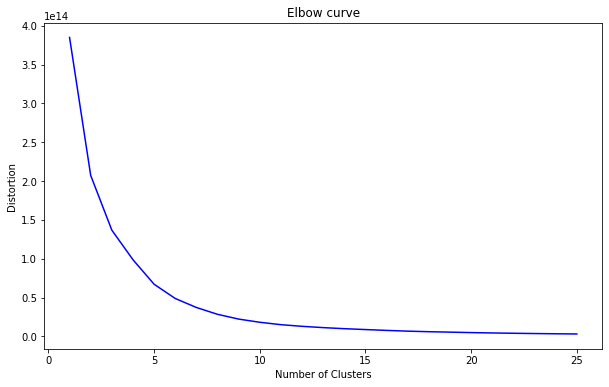

In [155]:
# Doing the elbow plot to find best k for this cluster
fig = plt.figure(figsize=(10, 6))
plt.plot(range(1, 26), distortion, c = 'b')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow curve')
plt.show()

# Generalized Function you Can Use

In [ ]:
# Getting the test set automatically onboarded
# One of my playlists : https://open.spotify.com/playlist/7i7k54YRMrYj9EWOIUDL0V?si=e4424d5a25e74b2f

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util


# Get the id that's after the word playlist/ for any insterted playlist 
link = 'https://open.spotify.com/playlist/7i7k54YRMrYj9EWOIUDL0V?si=e4424d5a25e74b2f'    
sourcePlaylistID = link.partition("playlist/")[2]

cid ='1f6e50553633498ab6124e919954e688' # Client ID; copy this from your app 
secret = '744fdd83b05a49a1935230f2ccd40aee' # Client Secret; copy this from your app
username = 'amenti4k' # Your Spotify username

#for avaliable scopes see https://developer.spotify.com/web-api/using-scopes/
scope = 'user-library-read playlist-modify-public playlist-read-private'

redirect_uri='https://developer.spotify.com/dashboard/applications/1f6e50553633498ab6124e919954e688' # Paste your Redirect URI here

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username, scope, cid, secret, redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids


ids = getTrackIDs('amenti4k', 'https://open.spotify.com/playlist/37i9dQZF1DWTkxQvqMy4WW?si=97502da51874485c')
    
    # Getting the track information such as track name, album, release date, length, and popularity, along with the list of audio features that Spotify’s API has to offer from each track ids.

def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)
   # meta
    artist_name = meta['album']['artists'][0]['name']
    track_name = meta['name']
    duration_ms_x = meta['duration_ms']
    duration_ms_y = meta['duration_ms']
    
    
    album_name = meta['album']['name']
    name = 'new_playlist'
    #release_date = meta['album']['release_date']

    #popularity = meta['popularity']

  # features
    
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    key = features[0]['key']
    loudness = features[0]['loudness']
    mode = features[0]['mode']
    speechiness = features[0]['speechiness']
    acousticness = features[0]['acousticness']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    valence = features[0]['valence']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    playlist_track = features[0]['time_signature']

    track = [[artist_name,track_name,duration_ms_x,duration_ms_y,album_name,name,danceability, energy, key, loudness, mode,
speechiness, acousticness, instrumentalness, liveness, valence, tempo,time_signature,playlist_track]]
    return track

# Loop over the tracks and create a csv file containing all the songs

tracks = []
for i in range(len(ids)):
    time.sleep(.5)
    track = getTrackFeatures(ids[i])
    tracks.append(track)

# create dataset

df = pd.DataFrame(tracks, columns = df_test[['artist_name','track_name','duration_ms_x','duration_ms_y','album_name','name','danceability', 'energy', 'key', 'loudness', 'mode',
'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','time_signature','playlist_track']])

In [189]:
link = 'https://open.spotify.com/playlist/7i7k54YRMrYj9EWOIUDL0V?si=e4424d5a25e74b2f'    
sourcePlaylistID = link.partition("playlist/")[2] 
sourcePlaylist = spotipy.user_playlist(username,sourcePlaylistID);
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

NameError: name 'spotipy' is not defined

In [ ]:
# Generalize for any music label and playlist

def cluster_recs(test, train):
    '''input 1: new user's music
        input 2: our suggestion base
        output: '''
    
    # Use the above functions to collect song attributes and clean data from Spotify API
    ....#This is where we take the test given to us, and try to match it to the style we have 
    (!!???) Ask for code here
    
    # create main dataframe using playlist songs and all label's songs, to be fed into model
    main_df = pd.concat([df_new, df_new_test], axis=0).reset_index(drop=True)
    # convert main dataframe to array
    dropped = main_df.drop(['artist_name','track_name','name','album_name','playlist_track'], axis=1)
    main_array = np.array(dropped)
    
    #CLUSTERING THEM TOGETHER
    # instantiate kmeans class and set n_clusters
    k_means = KMeans(random_state=1, n_clusters=6) # default n_clusters = 8

    # fit to data
    k_means.fit(main_array)

    # predict which clusters each song belongs too
    predicted_clusters = k_means.fit_predict(main_array)

    # each instance was assigned to one of the clusters
    predicted_clusters 

    # concatenate cluster labels with main dataframe
    pred_series = pd.Series(predicted_clusters)
    main_df_w_pred = pd.concat([main_df, pred_series], axis=1)
    main_df_w_pred.rename(columns={0:'cluster'},inplace=True)

    #Inspect Each Cluster
    # Inspect songs in cluster 0
    #main_df_w_pred[['name', 'artist_name', 'cluster', 'playlist_track']][main_df_w_pred.cluster==0]

    #Make Recommendations

    # look at the clusters most similar to user's playlist
    relevant_clusters = main_df_w_pred['cluster'][main_df_w_pred.playlist_track==0]

    # drop the user playlist songs from df, so they aren't recommended again
    pred_df = main_df_w_pred.drop(main_df_w_pred[main_df_w_pred.playlist_track==0].index)

    # return random recommendation from each cluster
    recs=[]
    for k in relevant_clusters:
        recs +=pred_df[['track_name', 'artist_name']][pred_df.cluster==k].sample(1, random_state=543).values.tolist()
        pred_df.drop(pred_df[['track_name', 'artist_name']][pred_df.cluster==k].sample(1, random_state=543).index,inplace=True)

    print('Songs similar to your playlist:\n')
    for song in recs:
        print(song[0]+', by '+ song[1]